# Pandas

In [135]:
import pandas as pd
import yfinance as yf
import numpy as np
from icecream import ic


In [136]:
cotacoes = yf.download('^BVSP')['Close']

cotacoes = cotacoes.pct_change().dropna().to_frame()

cotacoes

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
1993-04-28,-0.008163
1993-04-29,-0.024691
1993-04-30,0.016878
1993-05-03,0.000000
1993-05-04,0.033195
...,...
2023-10-09,0.008636
2023-10-10,0.013729
2023-10-11,0.002690


In [137]:
cotacoes['year'] = cotacoes.index.year
cotacoes['month'] = cotacoes.index.month

In [138]:
def estatisticas_ibov(agrupamento):
    # obj do que foi agrupado (ano)
    return {
        'min': agrupamento.min() * 100,
        'max': agrupamento.max() * 100,
        'media': agrupamento.mean() * 100,
        'vol': agrupamento.std() * np.sqrt(252)
        }

In [139]:
estatisticas_por_ano = cotacoes.groupby('year')['Close'].apply(estatisticas_ibov)

estatisticas_por_ano

year       
1993  min      -9.503696
      max      11.044571
      media     1.662131
      vol       0.521738
1994  min     -10.596462
                 ...    
2022  vol       0.210956
2023  min      -3.321791
      max       4.287804
      media     0.034696
      vol       0.177635
Name: Close, Length: 124, dtype: float64

In [140]:
cotacoes = yf.download('WEGE3.SA')['Adj Close']
cotacoes.tail(3)

[*********************100%%**********************]  1 of 1 completed


Date
2023-10-11    35.169998
2023-10-13    34.540001
2023-10-16    34.830002
Name: Adj Close, dtype: float64

In [141]:
# normalizar os dados é transformar a media em 0 e o desvio padrao em 1
cotacoes_weg_normalizadas = cotacoes.transform(lambda x: (x - x.mean())/ x.std())
cotacoes_weg_normalizadas


Date
2000-01-03   -0.658618
2000-01-04   -0.658995
2000-01-05   -0.658995
2000-01-06   -0.659939
2000-01-07   -0.659939
                ...   
2023-10-09    2.400284
2023-10-10    2.439921
2023-10-11    2.428470
2023-10-13    2.372979
2023-10-16    2.398523
Name: Adj Close, Length: 5976, dtype: float64

In [142]:
cotacoes_weg_normalizadas.describe()

count    5.976000e+03
mean     3.804780e-17
std      1.000000e+00
min     -6.604105e-01
25%     -5.972009e-01
50%     -4.597826e-01
75%     -1.109239e-02
max      3.219822e+00
Name: Adj Close, dtype: float64

In [143]:
cotacoes_maxdd = cotacoes.to_frame()
cotacoes_maxdd['ano'] = cotacoes_maxdd.index.year
cotacoes_maxdd['maxima_do_ano'] = cotacoes_maxdd.groupby('ano')['Adj Close'].cummax()
#cummax passa de valor em valor registrando o valor de maior fechamento, comparado ao dia anterior até o maximo do agrupamento


cotacoes_maxdd

,Adj Close,ano,maxima_do_ano
Date,,,
2000-01-03,0.122103,2000,0.122103
2000-01-04,0.117818,2000,0.122103
2000-01-05,0.117818,2000,0.122103
2000-01-06,0.107107,2000,0.122103
2000-01-07,0.107107,2000,0.122103
...,...,...,...
2023-10-09,34.849998,2023,41.565277
2023-10-10,35.299999,2023,41.565277
2023-10-11,35.169998,2023,41.565277


In [144]:
cotacoes_maxdd['quedas'] = cotacoes_maxdd['Adj Close'] / cotacoes_maxdd['maxima_do_ano'] - 1
#cria uma coluna de quedas com o a divisao da cotacao da linha dividido pela maxima do agrupamento no momento
cotacoes_maxdd

,Adj Close,ano,maxima_do_ano,quedas
Date,,,,
2000-01-03,0.122103,2000,0.122103,0.000000
2000-01-04,0.117818,2000,0.122103,-0.035092
2000-01-05,0.117818,2000,0.122103,-0.035092
2000-01-06,0.107107,2000,0.122103,-0.122813
2000-01-07,0.107107,2000,0.122103,-0.122813
...,...,...,...,...
2023-10-09,34.849998,2023,41.565277,-0.161560
2023-10-10,35.299999,2023,41.565277,-0.150733
2023-10-11,35.169998,2023,41.565277,-0.153861


In [145]:
cotacoes_maxdd.groupby('ano')['quedas'].min()

ano
2000   -0.166670
2001   -0.055556
2002   -0.113636
2003    0.000000
2004   -0.007679
2005   -0.076355
2006   -0.120000
2007   -0.248874
2008   -0.597189
2009   -0.215026
2010   -0.202176
2011   -0.316355
2012   -0.133107
2013   -0.183673
2014   -0.105263
2015   -0.292097
2016   -0.204183
2017   -0.146915
2018   -0.236517
2019   -0.123639
2020   -0.466677
2021   -0.318399
2022   -0.354720
2023   -0.169254
Name: quedas, dtype: float64

## Desafio
> - Retorno acumulado ano a ano contra o Ibovespa
> - Estatísticas descritivas de volatilidade, média de retornos, maior retorno e menor retorno por ano
> - Maximo Drawdown por ano
> - Volume financeiro médio anual negociado pela empresa

In [173]:
# acao= input('Digite uma acao do mercado brasileiro').upper()
acao = 'ASAI3.SA'
dados_acao = yf.download(acao)

dados = yf.download([acao, '^BVSP'])
dados_cotacao = dados['Adj Close'].dropna()

retorno = dados_cotacao.pct_change().dropna()
retorno['year'] = retorno.index.year

#retorno acumulado por ano
retorno[f'{acao}'] = retorno[f'{acao}'] + 1 
retorno['^BVSP'] = retorno['^BVSP'] + 1 

retorno[f'retorno_YTD_{acao}'] = retorno.groupby('year')[f'{acao}'].cumprod() - 1
retorno['retorno_YTD_^BVSP'] = retorno.groupby('year')['^BVSP'].cumprod() - 1

ic('Retorno acumulado anual contra ibov')
retorno_por_ano = retorno.groupby('year').tail(1)[[f'retorno_YTD_{acao}', 'retorno_YTD_^BVSP'] ]
retorno_por_ano * 100


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed

ic| 'Retorno acumulado anual contra ibov'


,retorno_YTD_ASAI3.SA,retorno_YTD_^BVSP
Date,,
2021-12-30,-8.659564,-4.996601
2022-12-29,51.740296,4.969377
2023-10-16,-39.404327,5.975859


grafico de correlacao de 252 dias contra ibov


<Axes: xlabel='Date'>

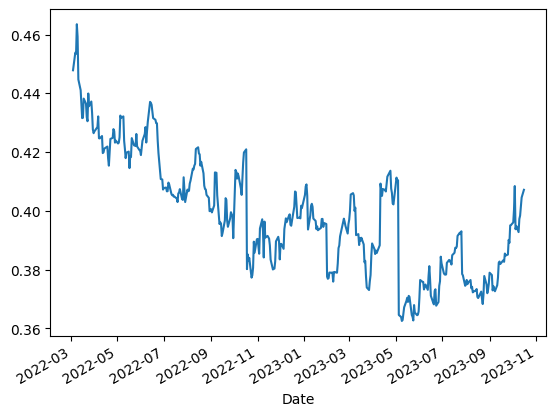

In [169]:
print('grafico de correlacao de 252 dias contra ibov')
retorno[acao].rolling(252).corr(retorno['^BVSP']).dropna().plot()

In [147]:
def estatisticas_descritivas(agrupamento):
    # obj do que foi agrupado (ano)
    return {
        'min': agrupamento.min() * 100,
        'max': agrupamento.max() * 100,
        'media': agrupamento.mean() * 100,
        'vol': agrupamento.std() * np.sqrt(252)
        }

In [148]:
print('estatisticas_descritivas')
retorno.groupby('year')[acao].apply(estatisticas_descritivas)

year       
2021  min      -5.320006
      max       6.827304
      media    -0.025499
      vol       0.300819
2022  min      -9.219857
      max       8.943092
      media     0.191915
      vol       0.356258
2023  min      -8.536582
      max      14.695344
      media    -0.217328
      vol       0.435944
Name: ASAI3.SA, dtype: float64

In [149]:
dados_cotacao = yf.download(acao)[['Close', 'Volume']]
dados_cotacao['year'] = dados_cotacao.index.year
dados_cotacao['Maximo Acumulado Ano'] = dados_cotacao.groupby('year')['Close'].cummax()
dados_cotacao['Queda'] = dados_cotacao['Close'] / dados_cotacao['Maximo Acumulado Ano'] - 1

[*********************100%%**********************]  1 of 1 completed


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11656\1392370936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cotacao['year'] = dados_cotacao.index.year
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11656\1392370936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cotacao['Maximo Acumulado Ano'] = dados_cotacao.groupby('year')['Close'].cummax()
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11656\1392370936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [150]:
dados_cotacao.groupby('year')['Queda'].min()

year
2021   -0.361211
2022   -0.139843
2023   -0.502605
Name: Queda, dtype: float64

In [151]:
dados_cotacao['Volume em Reais'] = dados_cotacao['Close'] * dados_cotacao['Volume']
dados_cotacao['Volume em Reais'] = dados_cotacao['Volume em Reais'].astype(int)

In [170]:
print('Volume financeiro médio anual')
dados_cotacao.groupby('year')['Volume em Reais'].mean().astype(int)

volume financeiro médio anual


year
2021    165609750
2022    157684040
2023    237051646
Name: Volume em Reais, dtype: int32